In [1]:
import pandas as pd
df = pd.read_csv("data.csv")

In [2]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Rank      lat      long                                           Airport  \
0   1.0  33.6324  -84.4277  Hartsfield–Jackson Atlanta International Airport   
1   2.0  32.8998  -97.0403           Dallas Fort Worth International Airport   
2   3.0  39.8561 -104.6737                      Denver International Airport   
3   4.0  41.9742  -87.9073                      O'Hare International Airport   
4   5.0  25.2532   55.3657                       Dubai International Airport   

                   Location               Country Code (IATA/ICAO)  \
0          Atlanta, Georgia         United States         ATL/KATL   
1  Dallas–Fort Worth, Texas         United States         DFW/KDFW   
2          Denver, Colorado         United States         DEN/KDEN   
3         Chicago, Illinois         United States         ORD/KORD   
4            Garhoud, Dubai  United Arab Emirates         DXB/OMDB   

   Total passengers  
0          93699630  
1          73362946  
2          69286461  
3         

In [3]:
top_airports = df.sort_values(by="Total passengers", ascending=False).head(10)

print("Top 10 Busiest Airports:")
print(top_airports[["Airport", "Country", "Total passengers"]])

Top 10 Busiest Airports:
                                            Airport               Country  \
0  Hartsfield–Jackson Atlanta International Airport         United States   
1           Dallas Fort Worth International Airport         United States   
2                      Denver International Airport         United States   
3                      O'Hare International Airport         United States   
4                       Dubai International Airport  United Arab Emirates   
5                 Los Angeles International Airport         United States   
6                                  Istanbul Airport                Turkey   
7                                  Heathrow Airport        United Kingdom   
8               Indira Gandhi International Airport                 India   
9                         Charles de Gaulle Airport                France   

   Total passengers  
0          93699630  
1          73362946  
2          69286461  
3          68340619  
4          660699

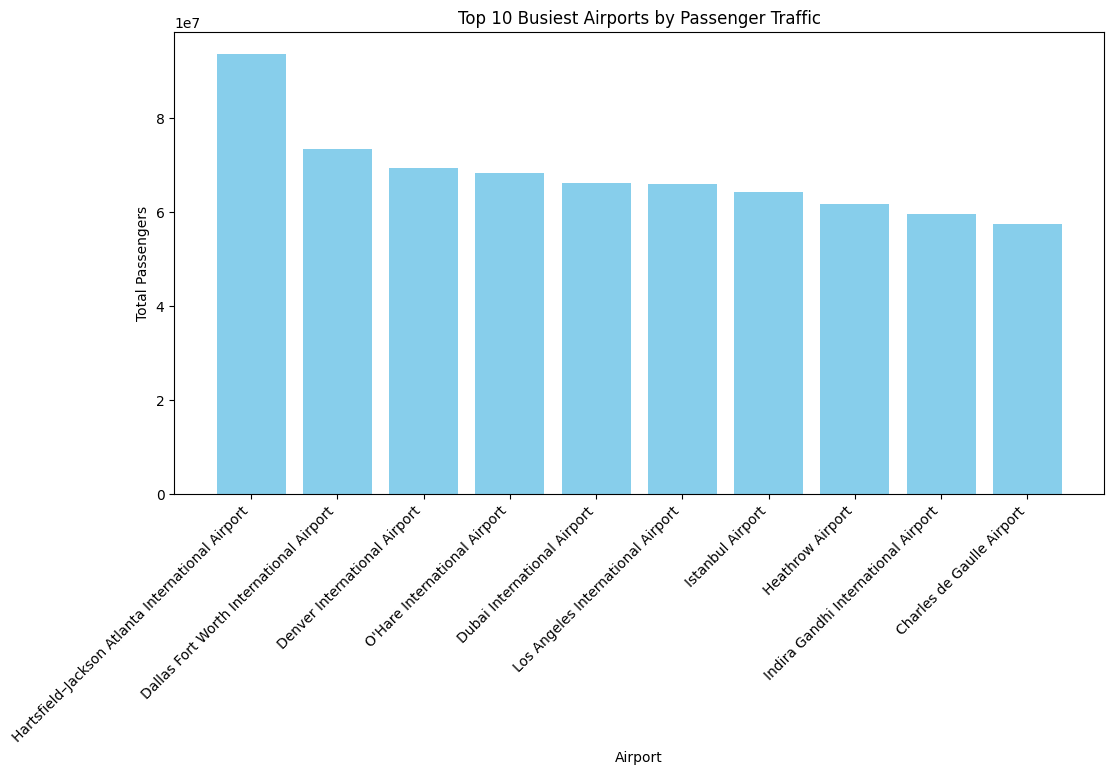

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top_airports["Airport"], top_airports["Total passengers"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Busiest Airports by Passenger Traffic")
plt.xlabel("Airport")
plt.ylabel("Total Passengers")
plt.show()

In [5]:
country_traffic = df.groupby("Country")["Total passengers"].sum().sort_values(ascending=False)

print("Top Countries by Total Passengers:")
print(country_traffic.head(10))



Top Countries by Total Passengers:
Country
United States           971746777
Turkey                  126297841
India                    97822180
United Kingdom           94462596
Spain                    92219166
France                   86661302
Germany                  80561220
Mexico                   76745823
United Arab Emirates     66069981
Netherlands              52472188
Name: Total passengers, dtype: int64


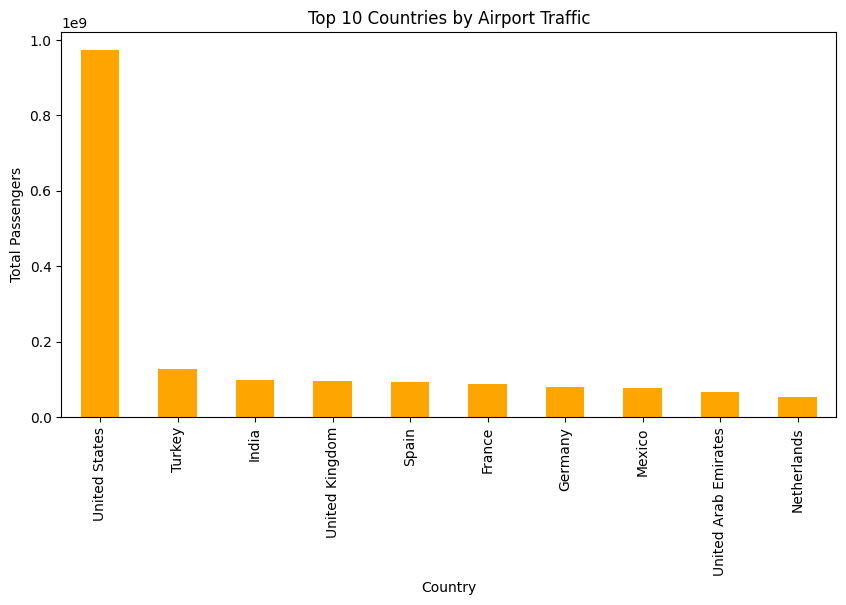

In [6]:
country_traffic.head(10).plot(kind="bar", figsize=(10,5), color="orange")
plt.title("Top 10 Countries by Airport Traffic")
plt.xlabel("Country")
plt.ylabel("Total Passengers")
plt.show()

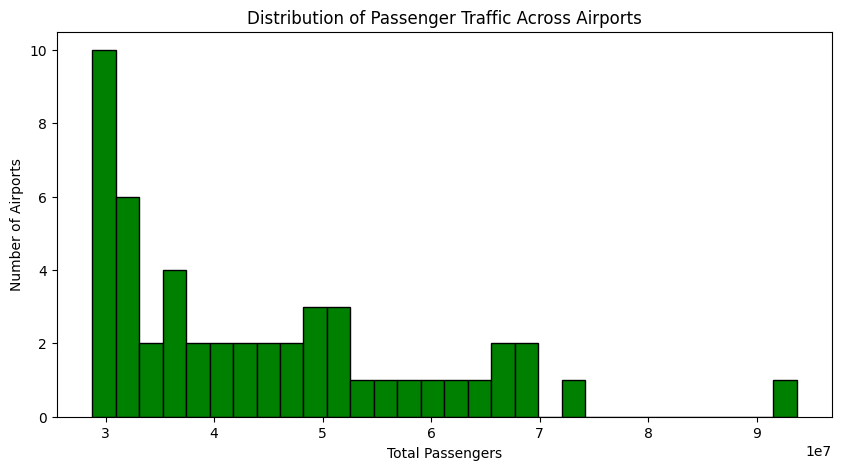

In [7]:
plt.figure(figsize=(10,5))
plt.hist(df["Total passengers"], bins=30, color="green", edgecolor="black")
plt.title("Distribution of Passenger Traffic Across Airports")
plt.xlabel("Total Passengers")
plt.ylabel("Number of Airports")
plt.show()


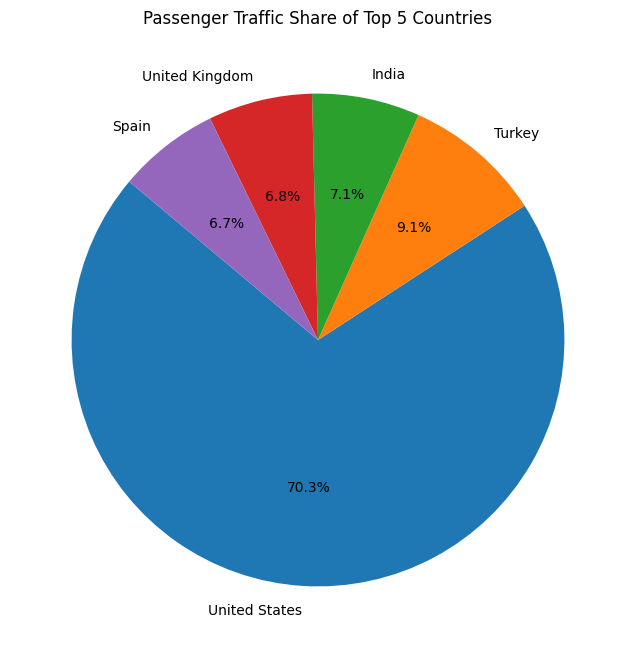

In [8]:
country_share = country_traffic.head(5)
plt.figure(figsize=(8,8))
plt.pie(country_share, labels=country_share.index, autopct="%1.1f%%", startangle=140)
plt.title("Passenger Traffic Share of Top 5 Countries")
plt.show()
